# SI 618 - Homework #2: More Data Manipulation

# Background
You're a Data Science Consultant for an eCommerce retail company, they've asked you to analyze their sales database. Unfortunately, they did nothing to prepare or clean their data, only exporting their 3 database tables as JSON files. It's up to you to clean their data, analyze it and answer questions to help drive business value!

### The below files have been provided via the URLs shown:
- invoices.json https://github.com/umsi-data-science/data/raw/main/invoices.json
- items.json https://github.com/umsi-data-science/data/raw/main/items.json
- purchases.json https://github.com/umsi-data-science/data/raw/main/purchases.json

### They provided this data dictionary:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.  
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
**Description:** Product (item) name. Nominal.   
**Quantity:** The quantities of each product (item) per transaction. Numeric.  
**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.  
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.  
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
**Country:** Country name. Nominal, the name of the country where each customer resides.  

### A few notes from the company:
* If the InvoiceNo starts with the letter 'c', it indicates a cancellation. When conducting this analysis we only want to analyze invoices that were shipped. (ie. not canceled)
* The datasets should be able to be merged, each row in the invoice table corresponds to multiple rows in the purchases table.
* To find out the description or unit cost of an item in the purchase table, the StockCode should be used to match up the product in the items table. 
* They mentioned that they've been having a difficult time lately joining the items and purchases table, maybe there's something wrong with the columns?

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

Version 2024.01.23.2.CT

# Answer the questions below.
- write your Python code that can answer the following questions 
- explain **ALL** your answers in plain English. 
- you can use as many code and markdown cells as you need for each question (i.e. don't limit yourself to just one of each if you feel you need more).

In [40]:
MY_UNIQNAME = 'JSANDEEP'  # replace this with your uniqname

### <span style="color:magenta"> Q1. [5 points] Describe the dataset. </span>
1. Load the data. 
1. How many total invoices have been placed?
1. How many unique customers are there?
1. What is the total number of unique items?
1. Are there any columns with null values?
1. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

In [41]:
import pandas as pd
import numpy as np

In [42]:
# Q1. Load the data.
Invoices_data = pd.read_json('https://github.com/umsi-data-science/data/raw/main/invoices.json')
Items_data = pd.read_json('https://github.com/umsi-data-science/data/raw/main/items.json')
Purchases_data = pd.read_json('https://github.com/umsi-data-science/data/raw/main/purchases.json')

In [43]:
Invoices_data.head()

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom


In [44]:
Items_data.head()

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39


In [45]:
Purchases_data.head()

,InvoiceNo,StockCodeSC,Quantity
0,536365,SC85123A,6
1,536365,SC71053,6
2,536365,SC84406B,8
3,536365,SC84029G,6
4,536365,SC84029E,6


## Cleaning the dataset

Clean Invoice_data

In [46]:
Invoices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25943 entries, 0 to 25942
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    25943 non-null  object 
 1   InvoiceDate  25943 non-null  object 
 2   CustomerID   22221 non-null  float64
 3   Country      25943 non-null  object 
dtypes: float64(1), object(3)
memory usage: 810.8+ KB


In [47]:
Invoices_data.describe()

,CustomerID
count,22221.000000
mean,15238.398317
std,1732.987098
min,12346.000000
25%,13755.000000
50%,15136.000000
75%,16746.000000
max,18287.000000


In [48]:
Invoices_data.dropna(subset=['CustomerID'],inplace = True)   # Removing the rows where the CustomerID is NaN

In [49]:
Invoices_data['CustomerID'] = Invoices_data['CustomerID'].astype(int)   # Converting the CustomerID column to a integer type
Invoices_data.drop(Invoices_data[Invoices_data['InvoiceNo'].str.lower().str.startswith('c')].index, inplace=True)   # Removing the rows where the InvoiceNo starts with 'C' OR 'c'.
Invoices_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18566 entries, 0 to 25942
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InvoiceNo    18566 non-null  object
 1   InvoiceDate  18566 non-null  object
 2   CustomerID   18566 non-null  int64 
 3   Country      18566 non-null  object
dtypes: int64(1), object(3)
memory usage: 725.2+ KB


I turned every piece of data in the a CustomerID into an integer and deleted the null values. The invoice numbers that begin with 'C' are not included.  I also looked for invoice numbers that were identical to the one with 'c' but didn't have a start of 'c'. Since I couldn't find any, I simply deleted them in accordance with the requirement.

Items_data cleaning

In [50]:
Items_data.isnull().sum()

StockCode        0
Description    176
UnitPrice        0
dtype: int64

In [51]:
Items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StockCode    4070 non-null   object 
 1   Description  3894 non-null   object 
 2   UnitPrice    4070 non-null   float64
dtypes: float64(1), object(2)
memory usage: 95.5+ KB


In [52]:
Items_data.describe()

,UnitPrice
count,4070.000000
mean,6.905278
std,173.775142
min,0.000000
25%,1.250000
50%,2.510000
75%,4.250000
max,11062.060000


In [53]:
# Used Chatgpt for the below code
Items_data['StockCode_cleaned'] = Items_data['StockCode'].str.replace(r'\D', '').str.extract(r'(\d+)')  # Removing the non-numeric characters from the StockCode and extracting the numeric part of the StockCode 


In [54]:
Items_data['StockCode_cleaned'] = Items_data['StockCode_cleaned'].fillna(Items_data['StockCode'])# If the StockCode_cleaned is null then assign the original StockCode to it else assign the StockCode_cleaned to it

In [55]:
Items_data.isnull().sum()

StockCode              0
Description          176
UnitPrice              0
StockCode_cleaned      0
dtype: int64

I removed the nonnumeric characters from the stockCode; they may be the issue why the company was having difficulty with the data. While checking the data, I also saw a few non-numeric codes that did make sense, like POST, and I decided to retain them.

Purchase_Data cleaning

In [56]:
Purchases_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    541909 non-null  object
 1   StockCodeSC  541909 non-null  object
 2   Quantity     541909 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 12.4+ MB


In [57]:
Purchases_data.describe()

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [58]:
Purchases_data[Purchases_data['InvoiceNo'].str.startswith('C')] # Checking if there are any rows where the InvoiceNo starts with 'C' OR 'c'

,InvoiceNo,StockCodeSC,Quantity
141,C536379,SCD,-1
154,C536383,SC35004C,-1
235,C536391,SC22556,-12
236,C536391,SC21984,-24
237,C536391,SC21983,-24
...,...,...,...
540449,C581490,SC23144,-11
541541,C581499,SCM,-1
541715,C581568,SC21258,-5
541716,C581569,SC84978,-1


In [59]:
Purchases_data[Purchases_data['Quantity'] < 0] # Checking if there are any rows where the Quantity is less than 0

,InvoiceNo,StockCodeSC,Quantity
141,C536379,SCD,-1
154,C536383,SC35004C,-1
235,C536391,SC22556,-12
236,C536391,SC21984,-24
237,C536391,SC21983,-24
...,...,...,...
540449,C581490,SC23144,-11
541541,C581499,SCM,-1
541715,C581568,SC21258,-5
541716,C581569,SC84978,-1


In [60]:
Purchases_data[Purchases_data['InvoiceNo'].str.startswith('536379')]

,InvoiceNo,StockCodeSC,Quantity


In [61]:
Purchases_data['StockCodeCleaned'] = Purchases_data['StockCodeSC'].str.replace(r'\D', '').str.extract(r'(\d+)') # Removing the non-numeric characters from the StockCodeSC
Purchases_data['StockCodeCleaned'] = Purchases_data['StockCodeCleaned'].fillna(Purchases_data['StockCodeSC'])
Purchases_data.drop(Purchases_data[Purchases_data['InvoiceNo'].str.lower().str.startswith('c')].index, inplace=True) # Removing the rows where the InvoiceNo starts with 'C' OR 'c'.

In [62]:
Purchases_data[Purchases_data['Quantity'] < 0]

,InvoiceNo,StockCodeSC,Quantity,StockCodeCleaned
2406,536589,SC21777,-10,21777
4347,536764,SC84952C,-38,84952
7188,536996,SC22712,-20,22712
7189,536997,SC22028,-20,22028
7190,536998,SC85067,-6,85067
...,...,...,...,...
535333,581210,SC23395,-26,23395
535335,581212,SC22578,-1050,22578
535336,581213,SC22576,-30,22576
536908,581226,SC23090,-338,23090


In [63]:
Purchases_data.drop(Purchases_data[Purchases_data['Quantity'] < 0].index, inplace=True) # Removing the rows where the Quantity is less than 0 as Quantity can not be Negative

I removed the non-numeric characters from stockCodeSC while retaining the numeric part. I also retained the original stockCodeSC for the code, which got a null value after cleaning.
I removed InvoiceID, which started with C, and all the quantities, which were negative. My assumption here is that the quantity cannot be negative.

In [64]:
# Q1.2 How many total invoices have been placed?
Invoices_data.shape

(18566, 4)

In [65]:
Invoices_data['InvoiceNo'].unique().shape

(18536,)

In [66]:
#Q1.3. How many unique customers are there?
Invoices_data['CustomerID'].unique().shape # There are 4339 unique customers

(4339,)

In [67]:
#Q1.4 What is the total number of unique items?
Items_data.shape

(4070, 4)

In [68]:
Items_data['StockCode_cleaned'].unique().shape  # There are 3415 unique items

(3415,)

In [69]:
#Q5 Are there any columns with null values?
print(f"The number of null data in the Items_data are :\n{Items_data.isnull().sum()}")
print(f"The number of null data in the Invoices_data are :\n{ Invoices_data.isnull().sum()}")
print(f"The number of null data in the Purchases_data are :\n{Purchases_data.isnull().sum()}")

The number of null data in the Items_data are :
StockCode              0
Description          176
UnitPrice              0
StockCode_cleaned      0
dtype: int64
The number of null data in the Invoices_data are :
InvoiceNo      0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64
The number of null data in the Purchases_data are :
InvoiceNo           0
StockCodeSC         0
Quantity            0
StockCodeCleaned    0
dtype: int64


In [70]:
#Q6 Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

Q1.2. A total of 18566 InvoiceNo are present in the data, but there are only 18536 unique InvoiceNo are present in the dataset.This shows that the table has multiple rows with same InvoiceNo.

Q1.3. There are 4339 Unique CustomerID, which implied that there are 4339 number of unique Customers.

Q1.4. There are 3415 Unique StockCodes in the Items_data, Which implies 3415 unique item. I have not used description here because it is mentioned that a stockCode is provided to every unique item.

Q1.5. There is 1 columns in Items_data which ais 'Description' which has null values. All The other columns doesn't have a null value after cleaning. This value depends on the way the data is cleaned. For my method, I am getting only one column with a null value in the item_data.

Q1.6. The three dataset we have i.e. Invoices_data, Items_data and Purchases_data have different sizes, and concatenation is not possible, they can be joined using the common column 'InvoiceNo' and 'StockCodeCleaned'. We can use the merge function to join the datasets on the common column. We can use the 'inner' join to join the datasets if we are interested in the data that is common in all the datasets.
Based on the requirement we can join any two of the data or make one large dataframe.

### <span style="color:magenta"> Q2. [10 points] Invoice Analysis </span>
1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.
2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.
3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

_Hint: For 2.2, you may need to join two datasets together to answer the question._

In [71]:
#Q2.1.
Top_10_number_of_invoice = Invoices_data.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)
Top_10_number_of_invoice

CustomerID
12748    210
14911    201
17841    124
13089     97
14606     93
15311     91
12971     86
14646     74
16029     63
13408     62
Name: InvoiceNo, dtype: int64

In [72]:
#Q2.2
Invoices_purchase_merge_data = pd.merge(Invoices_data, Purchases_data, on='InvoiceNo')  # Merging the Invoices_data and Purchases_data on the InvoiceNo column
Invoices_purchase_merge_data

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity,StockCodeCleaned
0,536365,12/1/10 8:26,17850,United Kingdom,SC85123A,6,85123
1,536365,12/1/10 8:26,17850,United Kingdom,SC71053,6,71053
2,536365,12/1/10 8:26,17850,United Kingdom,SC84406B,8,84406
3,536365,12/1/10 8:26,17850,United Kingdom,SC84029G,6,84029
4,536365,12/1/10 8:26,17850,United Kingdom,SC84029E,6,84029
...,...,...,...,...,...,...,...
399532,581587,12/9/11 12:50,12680,France,SC22613,12,22613
399533,581587,12/9/11 12:50,12680,France,SC22899,6,22899
399534,581587,12/9/11 12:50,12680,France,SC23254,4,23254
399535,581587,12/9/11 12:50,12680,France,SC23255,4,23255


In [73]:
Top_10_number_of_Quantity = Invoices_purchase_merge_data.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(11) # Grouping the data by CustomerID and then summing the Quantity and then sorting the data in descending order and then taking the top 10 rows
Top_10_number_of_Quantity

CustomerID
14646    197491
14911     81009
16446     80997
12415     77670
12346     74215
17450     69993
17511     67423
18102     64124
13694     63312
14298     58343
14156     57885
Name: Quantity, dtype: int64

In [74]:
#2.3
pd.merge(Top_10_number_of_invoice, Top_10_number_of_Quantity, on='CustomerID') # Merging the Top_10_number_of_invoice and Top_10_number_of_Quantity on the CustomerID column

,InvoiceNo,Quantity
CustomerID,,
14911,201,81009
14646,74,197491


Q2.1. The top 10 Customers are shown above, The CustomerID 12748 has higest number of Invoices.

Q2.2. The top 10 Customers are shown above, The CustomerID 14646 has ordered very high quantity of goods.

Q2.3. The customer IDs 14911 and 14646 appear in both lists above. This shows that the number of invoices is not directly related to the quantity of goods ordered. These two customer IDs might be in both lists, but this is not enough proof to show that there is any correlation between them.

### <span style="color:magenta"> Q3. [10 points] Item Analysis </span>
1. What is the average item-unit price? 
1. What % of items are under $25?
1. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram? 

In [75]:
#Q3.1.
print(f"Average item-unit price is {Items_data['UnitPrice'].mean()}")  # Average item-unit price

Average item-unit price is 6.905277886977887


In [76]:
#Q3.2.
Items_under_25 = Items_data[Items_data['UnitPrice'] < 25]
percentage_of_items_under_25 = (Items_under_25.shape[0] / Items_data.shape[0]) * 100
print(f"Percentage of items under 25 is {percentage_of_items_under_25}%")  # Percentage of items under 25

Percentage of items under 25 is 98.74692874692875%


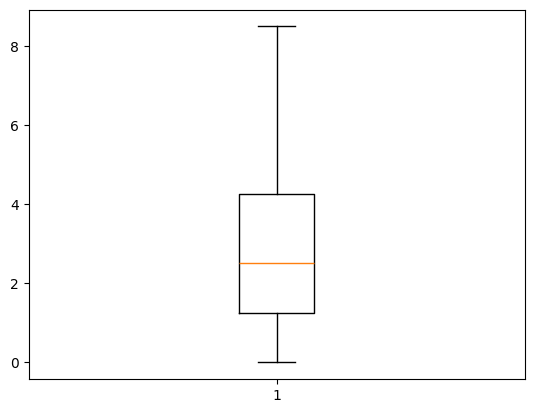

In [79]:
#Q3.3.
import matplotlib.pyplot as plt
plt.boxplot(Items_data['UnitPrice'], showfliers=False) # Boxplot of the UnitPrice for the range of the UnitPrice
plt.show()

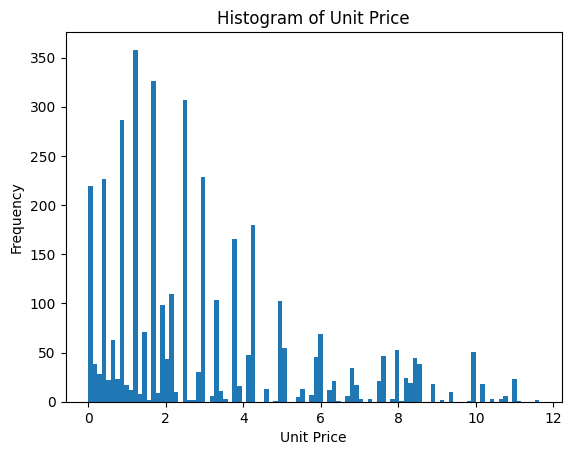

In [80]:
# Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram?
import matplotlib.pyplot as plt
Quantile_1 = Items_data['UnitPrice'].quantile(0.00)
Quantile_2 = Items_data['UnitPrice'].quantile(0.95)
plt.hist(Items_data['UnitPrice'], bins=100, range=(Quantile_1, Quantile_2))
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Histogram of Unit Price')
plt.show()

Q3.1. The average item-unit price is 6.905

Q3.2.  The majority of the items purchased are not expensive, as evidenced by the 98.75 percent of items priced under $25. This shows that maybe the store serves to the general public rather than the wealthy.

Q3.3. I chose the 0th quantile and the 95th quantile as the range. This is because I used a box plot to check the normal range of the unit prices, and based on that, I see that the values above 9 or 10 are outliers, and one such outlier has a very high unit price. Hence, I set the value of the quantile so that the outliers are not included. I also noticed that the histogram is approximately a right-skewed normal distribution.

### <span style="color:magenta"> Q4. [25 points] Order Trends </span>
1. What are the top 10 most ordered items? Describe them. Do you see any trends?
1. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by "marking up" the unit price by 25%.)
1. Do the top 5 invoices contain any of the top 10 most ordered items?

_Hint: When calculating the revenue we suggest adding a new column on the dataframe._

In [81]:
#Q4.1.
Item_purchase_merge_data = pd.merge(Items_data, Purchases_data, left_on='StockCode_cleaned', right_on='StockCodeCleaned')  # Merging the Items_data and Purchases_data on the StockCode_cleaned and StockCodeCleaned columns
Item_purchase_merge_data

,StockCode,Description,UnitPrice,StockCode_cleaned,InvoiceNo,StockCodeSC,Quantity,StockCodeCleaned
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123,536365,SC85123A,6,85123
1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123,536373,SC85123A,6,85123
2,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123,536375,SC85123A,6,85123
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123,536390,SC85123A,64,85123
4,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123,536394,SC85123A,32,85123
...,...,...,...,...,...,...,...,...
707976,23561,SET OF 6 RIBBONS PARTY,2.89,23561,581492,SC23561,1,23561
707977,23561,SET OF 6 RIBBONS PARTY,2.89,23561,581581,SC23561,6,23561
707978,23609,SET 10 CARDS SNOWY ROBIN 17099,2.91,23609,579187,SC23609,1,23609
707979,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2.91,23617,579512,SC23617,2,23617


In [84]:
Item_purchase_merge_data.groupby(['StockCode_cleaned'])['Description'].nunique().sort_values(ascending=False).head(10)  # Grouping the data by StockCode_cleaned and then taking the unique values of the Description and then sorting the data in descending order and then taking the top 10 rows

StockCode_cleaned
90214    24
85049     8
90059     6
46776     6
84596     6
84968     6
90036     6
17012     6
90129     6
90125     5
Name: Description, dtype: int64

In [92]:
Item_purchase_merge_data[Item_purchase_merge_data['StockCode_cleaned']== '90125']['Description'].unique()

array(['AQUA BERTIE GLASS BEAD BAG CHARM',
       'PURPLE BERTIE GLASS BEAD BAG CHARM',
       'PINK BERTIE GLASS BEAD BAG CHARM',
       'AMBER BERTIE GLASS BEAD BAG CHARM',
       'TURQUOISE BERTIE GLASS BEAD CHARM'], dtype=object)

In [87]:
Top_10_most_ordered_item = Item_purchase_merge_data.groupby(['StockCode_cleaned'])['Quantity'].sum().sort_values(ascending=False).head(10) # Grouping the data by StockCode_cleaned and then summing the Quantity and then sorting the data in descending order and then taking the top 10 rows
Top_10_most_ordered_item

StockCode_cleaned
85099    319292
85049    154154
84596    148181
84997    133992
85123     83912
23843     80995
23166     78033
47566     66540
84970     61636
22197     56921
Name: Quantity, dtype: int64

In [ ]:
Item_purchase_merge_data[Item_purchase_merge_data['StockCode_cleaned'].isin(Top_10_most_ordered_item.index)][['Description', 'StockCode_cleaned']].drop_duplicates() # Filtering the data where the StockCode_cleaned is in the Top_10_most_ordered_item and then selecting the Description and StockCode_cleaned columns and then removing the duplicates

,Description,StockCode_cleaned
0,WHITE HANGING HEART T-LIGHT HOLDER,85123
35193,JUMBO BAG BAROQUE BLACK WHITE,85099
39092,JUMBO BAG RED RETROSPOT,85099
42991,JUMBO BAG STRAWBERRY,85099
51823,RED 3 PIECE RETROSPOT CUTLERY SET,84997
53547,BLUE 3 PIECE POLKADOT CUTLERY SET,84997
55271,PINK 3 PIECE POLKADOT CUTLERY SET,84997
56995,GREEN 3 PIECE POLKADOT CUTLERY SET,84997
106458,TRADITIONAL CHRISTMAS RIBBONS,85049
108258,SCANDINAVIAN REDS RIBBONS,85049


In [ ]:
#Q4.2.
Item_purchase_merge_data['Revenue'] = Item_purchase_merge_data['UnitPrice'] * Item_purchase_merge_data['Quantity'] * 1.25  # Calculating the Revenue by marking up the unit price by 25%
Top_revenue = Item_purchase_merge_data.groupby('InvoiceNo')['Revenue'].sum().sort_values(ascending=False).head(5)

In [ ]:
def two_decimals(x):
    """This function rounds the number to 2 decimal places"""
    return round(x, 2)

In [ ]:
Top_revenue.apply(two_decimals)

InvoiceNo
581483    210587.00
541431     96479.50
540785     61362.00
558871     53861.33
556917     47088.11
Name: Revenue, dtype: float64

In [ ]:
Item_purchase_merge_data[Item_purchase_merge_data['InvoiceNo'] == Top_revenue.index[4]]

,StockCode,Description,UnitPrice,StockCode_cleaned,InvoiceNo,StockCodeSC,Quantity,StockCodeCleaned,Revenue
11120,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,3.75,22749,556917,SC22749,48,22749,225.00
14911,22960,JAM MAKING SET WITH JARS,4.25,22960,556917,SC22960,36,22960,191.25
20586,22326,ROUND SNACK BOXES SET OF4 WOODLAND,2.95,22326,556917,SC22326,96,22326,354.00
21431,22629,SPACEBOY LUNCH BOX,1.95,22629,556917,SC22629,64,22629,156.00
22307,22659,LUNCH BOX I LOVE LONDON,1.95,22659,556917,SC22659,128,22659,312.00
...,...,...,...,...,...,...,...,...,...
663764,23244,ROUND STORAGE TIN VINTAGE LEAF,1.95,23244,556917,SC23244,96,23244,234.00
663885,23237,SET OF 4 KNICK KNACK TINS LEAVES,4.15,23237,556917,SC23237,48,23237,249.00
668772,23292,SPACE BOY CHILDRENS CUP,1.25,23292,556917,SC23292,96,23292,150.00
668996,23291,DOLLY GIRL CHILDRENS CUP,1.25,23291,556917,SC23291,96,23291,150.00


In [ ]:
#Q4.3.
Data_top_revenue = Item_purchase_merge_data[Item_purchase_merge_data['InvoiceNo'].isin(Top_revenue.index)] # Filtering the data where the InvoiceNo is in the Top_revenue

In [ ]:
Data_top_revenue

,StockCode,Description,UnitPrice,StockCode_cleaned,InvoiceNo,StockCodeSC,Quantity,StockCodeCleaned,Revenue
11120,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,3.75,22749,556917,SC22749,48,22749,225.00
14911,22960,JAM MAKING SET WITH JARS,4.25,22960,556917,SC22960,36,22960,191.25
20586,22326,ROUND SNACK BOXES SET OF4 WOODLAND,2.95,22326,556917,SC22326,96,22326,354.00
21431,22629,SPACEBOY LUNCH BOX,1.95,22629,556917,SC22629,64,22629,156.00
22307,22659,LUNCH BOX I LOVE LONDON,1.95,22659,556917,SC22659,128,22659,312.00
...,...,...,...,...,...,...,...,...,...
663885,23237,SET OF 4 KNICK KNACK TINS LEAVES,4.15,23237,556917,SC23237,48,23237,249.00
668772,23292,SPACE BOY CHILDRENS CUP,1.25,23292,556917,SC23292,96,23292,150.00
668996,23291,DOLLY GIRL CHILDRENS CUP,1.25,23291,556917,SC23291,96,23291,150.00
670456,23229,VINTAGE DONKEY TAIL GAME,3.39,23229,556917,SC23229,144,23229,610.20


In [ ]:
Top_10_most_ordered_item.index.isin(Data_top_revenue['StockCode_cleaned']) # Checking if the Top_10_most_ordered_item is in the Data_top_revenue

array([ True, False, False,  True, False,  True,  True, False, False,
       False])

In [ ]:
Top_10_most_ordered_item[Top_10_most_ordered_item.index.isin(Data_top_revenue['StockCode_cleaned']) == True] # Getting the Top_10_most_ordered_item StockCode which is in the Data_top_revenue

StockCode_cleaned
85099    319292
84997    133992
23843     80995
23166     78033
Name: Quantity, dtype: int64

Q4.1. The most ordered 10 items includes Holder, Cutlery sets, Jumbo bags, Ribbons, Bowl, Party Bunting, Paper craft. These are few items which are used in household and they are highly used when there some special occasion. I haven not used description in this case to group them as it is stated that the Stockcode is provided to every unique Item.

Q4.2. The five invoices that generated most revenue are 581483, 541431, 540785, 558871, 556917. Upon careful observation we see the highest quantity sold in a single invoice is for Paper craft, this is because of high quantity of that item. where as other invoices have different items with reasonable quantity of items

Q4.3. 4 out of top 10 ordered items are in the top 5 invoices, they are JUMBO BAG, CUTLERY SETs, PAPER CRAFT , LITTLE BIRDIE and STORAGE JAR. We know that there was one large order for the paper craft which is why we can see them in both the list, the other items are object which are frequently bought in bulks.

### <span style="color:magenta"> Q5. [30 points] Customer Analysis </span>
1. Classify customers into segments based on the total revenue they have generated for the company.
 * low value: less than \$1750  
 * medium value: between 1750 and 8250 dollars
 * high value: greater than \$8250
1. How many customers are in each segment? 
1. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.
1. Are the items with the highest average order quantity generally the same across segments? Explain your reasoning. 
1. Choose three items and discuss any trends/differences you notice across the three segments.

_Hint: When calculating the segment, we suggest constructing a new dataframe as an intermediary step with the columns: CustomerID, Revenue, Segment._

In [ ]:
#Q5.1.
Final_merged_data = pd.merge(Item_purchase_merge_data, Invoices_data, on = 'InvoiceNo')  # Merging the Item_purchase_merge_data and Customer_data on the CustomerID column
Final_merged_data

,StockCode,Description,UnitPrice,StockCode_cleaned,InvoiceNo,StockCodeSC,Quantity,StockCodeCleaned,Revenue,InvoiceDate,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123,536365,SC85123A,6,85123,19.125,12/1/10 8:26,17850,United Kingdom
1,85123a,WHITE HANGING HEART T-LIGHT HOLDER,6.77,85123,536365,SC85123A,6,85123,50.775,12/1/10 8:26,17850,United Kingdom
2,71053,WHITE METAL LANTERN,3.39,71053,536365,SC71053,6,71053,25.425,12/1/10 8:26,17850,United Kingdom
3,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,84406,536365,SC84406B,8,84406,27.500,12/1/10 8:26,17850,United Kingdom
4,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,84029,536365,SC84029G,6,84029,25.425,12/1/10 8:26,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...
509283,23560,SET OF 6 RIBBONS COUNTRY STYLE,2.89,23560,580542,SC23560,6,23560,21.675,12/5/11 9:04,15358,United Kingdom
509284,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,2.89,23562,580542,SC23562,6,23562,21.675,12/5/11 9:04,15358,United Kingdom
509285,23561,SET OF 6 RIBBONS PARTY,2.89,23561,580542,SC23561,6,23561,21.675,12/5/11 9:04,15358,United Kingdom
509286,23561,SET OF 6 RIBBONS PARTY,2.89,23561,579108,SC23561,24,23561,86.700,11/28/11 11:44,16705,United Kingdom


In [ ]:
bins = [-np.inf,1750,8250,np.inf]
labels = ['low value','medium value','high value']

In [ ]:
Revenue_sum = Final_merged_data.groupby('CustomerID')['Revenue'].sum() # Grouping the data by CustomerID and then summing the Revenue
Revenue_sum_category['Revenue_Category'] = pd.cut(Revenue_sum, bins=bins, labels=labels)

In [ ]:
Revenue_sum_category.head()

CustomerID
12346      high value
12347      high value
12348    medium value
12349    medium value
12350       low value
Name: Revenue_Category, dtype: object

In [ ]:
Final_data_with_category = Final_merged_data.merge(Revenue_sum_category, on=['CustomerID'])

In [ ]:
Final_data_with_category

,StockCode,Description,UnitPrice,StockCode_cleaned,InvoiceNo,StockCodeSC,Quantity,StockCodeCleaned,Revenue,InvoiceDate,CustomerID,Country,Revenue_Category
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123,536365,SC85123A,6,85123,19.125,12/1/10 8:26,17850,United Kingdom,high value
1,85123a,WHITE HANGING HEART T-LIGHT HOLDER,6.77,85123,536365,SC85123A,6,85123,50.775,12/1/10 8:26,17850,United Kingdom,high value
2,71053,WHITE METAL LANTERN,3.39,71053,536365,SC71053,6,71053,25.425,12/1/10 8:26,17850,United Kingdom,high value
3,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,84406,536365,SC84406B,8,84406,27.500,12/1/10 8:26,17850,United Kingdom,high value
4,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,84029,536365,SC84029G,6,84029,25.425,12/1/10 8:26,17850,United Kingdom,high value
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509283,23515,EMBROIDERED RIBBON REEL DAISY,2.08,23515,571439,SC23515,12,23515,31.200,10/17/11 13:25,17206,United Kingdom,low value
509284,23514,EMBROIDERED RIBBON REEL SALLY,2.08,23514,571439,SC23514,12,23514,31.200,10/17/11 13:25,17206,United Kingdom,low value
509285,23518,EMBROIDERED RIBBON REEL RACHEL,2.89,23518,571439,SC23518,12,23518,43.350,10/17/11 13:25,17206,United Kingdom,low value
509286,23513,EMBROIDERED RIBBON REEL SUSIE,2.08,23513,571439,SC23513,12,23513,31.200,10/17/11 13:25,17206,United Kingdom,low value


In [ ]:
#Q5.1.
Revenue_sum_category['Customer_Category'].value_counts()

Revenue
low value       2516
medium value    1431
high value       388
Name: count, dtype: int64

In [ ]:
#Q5.2.
pivot_table = pd.pivot_table(Final_data_with_category, values='Quantity', index='StockCodeCleaned', columns='Revenue_Category', aggfunc='mean') # Creating a pivot table with the Quantity as the values and StockCodeCleaned as the index and Revenue_Category as the columns and mean as the aggregate function

In [ ]:
pivot_table .head()

Revenue_Category,high value,low value,medium value
StockCodeCleaned,,,
10002,27.45,7.75,9.458333
10080,12.50,24.00,13.562500
10120,6.50,5.50,7.166667
10123,NaN,2.00,1.000000
10124,NaN,4.00,3.400000


In [ ]:
#Q5.3.
pivot_table.idxmax()

Revenue_Category
high value      23843
low value       17096
medium value    18007
dtype: object

In [ ]:
Selected_stock_code = pivot_table.idxmax().values

In [ ]:
pivot_table.loc[Selected_stock_code]

Revenue_Category,high value,low value,medium value
StockCodeCleaned,,,
23843,80995.000000,NaN,NaN
17096,50.428571,681.0,40.000000
18007,24.000000,15.8,520.818182


In [ ]:
Final_data_with_category[Final_data_with_category['StockCodeCleaned'] == Selected_stock_code[0]].head(5)

,StockCode,Description,UnitPrice,StockCode_cleaned,InvoiceNo,StockCodeSC,Quantity,StockCodeCleaned,Revenue,InvoiceDate,CustomerID,Country,Revenue_Category
509234,23843,"PAPER CRAFT , LITTLE BIRDIE",2.08,23843,581483,SC23843,80995,23843,210587.0,12/9/11 9:15,16446,United Kingdom,high value


In [ ]:
Final_data_with_category[Final_data_with_category['StockCodeCleaned'] == Selected_stock_code[1]].head(5)

,StockCode,Description,UnitPrice,StockCode_cleaned,InvoiceNo,StockCodeSC,Quantity,StockCodeCleaned,Revenue,InvoiceDate,CustomerID,Country,Revenue_Category
43546,17096,ASSORTED LAQUERED INCENSE HOLDERS,0.43,17096,551291,SC17096,96,17096,51.6,4/27/11 14:26,14298,United Kingdom,high value
79765,17096,ASSORTED LAQUERED INCENSE HOLDERS,0.43,17096,542058,SC17096,96,17096,51.6,1/25/11 11:59,15601,United Kingdom,high value
97347,17096,ASSORTED LAQUERED INCENSE HOLDERS,0.43,17096,541280,SC17096,48,17096,25.8,1/17/11 11:57,15296,United Kingdom,high value
131222,17096,ASSORTED LAQUERED INCENSE HOLDERS,0.43,17096,549116,SC17096,48,17096,25.8,4/6/11 12:49,16670,United Kingdom,high value
151317,17096,ASSORTED LAQUERED INCENSE HOLDERS,0.43,17096,542776,SC17096,48,17096,25.8,2/1/11 8:23,15240,United Kingdom,medium value


In [ ]:
Final_data_with_category[Final_data_with_category['StockCodeCleaned'] == Selected_stock_code[2]].head(5)

,StockCode,Description,UnitPrice,StockCode_cleaned,InvoiceNo,StockCodeSC,Quantity,StockCodeCleaned,Revenue,InvoiceDate,CustomerID,Country,Revenue_Category
153611,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,0.18,18007,545590,SC18007,24,18007,5.400,3/4/11 10:24,15220,United Kingdom,medium value
173265,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,0.18,18007,537351,SC18007,1,18007,0.225,12/6/10 12:23,16898,United Kingdom,low value
179037,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,0.18,18007,560555,SC18007,12,18007,2.700,7/19/11 13:01,14178,United Kingdom,medium value
179038,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,0.18,18007,560555,SC18007,8,18007,1.800,7/19/11 13:01,14178,United Kingdom,medium value
249533,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,0.18,18007,552062,SC18007,24,18007,5.400,5/6/11 10:45,13117,United Kingdom,medium value


Q5.1. Classified the customers into segments based on the total revenue they generated for the company. I used negative infinity as the lowest values, we can use 0 too,it doesn't make a difference in this case. as values in -ve are removed in the preprocessing.

Q5.1. We see a large number of customers in the low segment, then in the medium and lowest in the high value. This implies that most of the consumers for this company are maybe from middle-class families in terms of wealth.

Q5.2. The pivot table shows how much quantity of a stock is ordered by different segments.

Q5.3. The items with the highest average order quantity are different across the segments. This may be because these items are ordered by certain subsets of the population; the rich and wealthy might need an item that is not required by medium and low value customers, while the items used by low-value customers might not be of any use to high-value customers. This is also explained in the fourth part of this question.

Q5.4. The stockcode 23843 is ordered by only high-value customers and not by low- or middle-value consumers, as they might not require this item in their day-to-day lives. The item with stock code 17096 is generally ordered by all three segments, but mostly by the low-value segment. This is the incense holder; this shows that this item is generally used by the low-value customer, and it may be that this item is bought frequently by them. The item with stockcode 18007 is mostly used by medium-value customers, not so much by low- and high-value customers. The item is balm, which may be used for headaches and pain. My hypothesis is that the medium-value customers, which include office workers and so on, might need that to reduce stress and pain.

# Please submit your completed notebook in .IPYNB and .HTML formats via Canvas